In [158]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np
current_directory = os.getcwd()
data_directory = current_directory 
filename = "geen_WLS.dat"

a_fit and b_fit =  4150386636454.479     0.08624688796897878


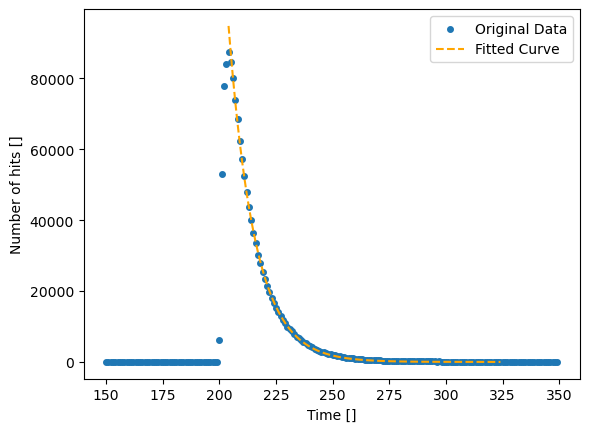

In [173]:
file_path = os.path.join(data_directory, filename)  #goes in right directory to open file, copies data into 'data'
#with open(file_path, 'r') as datafile:
   #data= datafile.readlines()

#print(data, '\n')  

data=[]

with open(file_path, 'r') as file:
     # Skip the first 10 lines
    for _ in range(10):
        next(file)

    for line in file:
        # Skip lines that start with '#'
        if not line.startswith('#'):
            # Split the line into numbers and convert to integers
            numbers = [int(num) for num in line.split()]
            # Append the first number from the line
            data.append(numbers[0])
            
#print(len(data), '\n')

x= []
y=[]
x_data=[]

y=data[205:300]
x=[index for index in range (205,300)]
x_data=[i for i in range (150,350)]


## Plot the data
#plt.plot(x_data,data[150:350],  marker='o')
#plt.xlabel('Index')
#plt.ylabel('Values')
#plt.title('First Number from Each Line')
##plt.show()


# Define the exponential function to fit
def exponential_func(x, a, b):
    return a * np.exp(-b * np.array(x))

# Use curve_fit to fit the data to the exponential function
params, covariance = curve_fit(exponential_func,x, data[205:300], p0=(10000,0.01))

# Extract the fitted parameters
a_fit, b_fit = params
print('a_fit and b_fit = ', a_fit,'   ', b_fit )

# Generate the fitted curve
fitted_curve=[]
x_fit=[]
x_fit= [i for i in range(204, 325)]
fitted_curve = exponential_func(x_fit, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, data[150:350], label='Original Data', marker='.', lw=2)

#plt.plot(x_data, data[150:350], label='Original Data', marker='.', lw=2)
plt.plot(x_fit, fitted_curve, label='Fitted Curve', linestyle='--', color='orange')
plt.xlabel('Time []')
plt.ylabel('Number of hits []')
#plt.title('Exponential Curve Fitting')
plt.legend()
plt.savefig(os.path.join(current_directory,'Green_fiber_plot.png'))
plt.show()

